In [1]:
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import event and condition dataframes
ER_df= pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\ER_df.csv")
hospital_df = pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\hospital_df.csv")
outpatient_df = pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\outpatient_df.csv")


In [4]:
#the cleaned dataframes-no duplicates-no NAN--no -15
print(f'ER: {ER_df.shape}')
print(f'Hospital: {hospital_df.shape}')
print(f'Outpatient: {outpatient_df.shape}')

ER: (2500, 5)
Hospital: (1119, 5)
Outpatient: (11422, 5)


In [5]:
#column refresher
ER_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ICD10     2500 non-null   object 
 1   medicaid  2500 non-null   float64
 2   medicare  2500 non-null   float64
 3   private   2500 non-null   float64
 4   month     2500 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 97.8+ KB


Investigate the data statistically

In [ ]:
#total for Medicare, Medicaid, Private for each
ER_medicare = ER_df['medicare'].sum()
ER_medicaid = ER_df['medicaid'].sum()
ER_private = ER_df['private'].sum()
ER_total_payments = ER_medicare + ER_medicaid + ER_private
print(f'ER_medicare: ${ER_medicare:,.2f}, ER_medicaid: ${ER_medicaid:,.2f}, ER_private: ${ER_private:,.2f}, ER_total_payments: ${ER_total_payments:,.2f}')

hospital_medicare = hospital_df['medicare'].sum()
hospital_medicaid = hospital_df['medicaid'].sum()
hospital_private = hospital_df['private'].sum()
hospital_total_payments = hospital_medicare + hospital_medicaid + hospital_private
print(f'hospital_medicare: ${hospital_medicare:,.2f}, hospital_medicaid: ${hospital_medicaid:,.2f}, ER_private: ${hospital_private:,.2f}, hospital_total_payments: ${hospital_total_payments:,.2f}')

outpatient_medicare = outpatient_df['medicare'].sum()
outpatient_medicaid = outpatient_df['medicaid'].sum()
outpatient_private = outpatient_df['private'].sum()
outpatient_total_payments = outpatient_medicare + outpatient_medicaid + outpatient_private
print(f'outpatient_medicare: ${ER_medicare:,.2f}, outpatient_medicaid: ${ER_medicaid:,.2f}, outpatient_private: ${outpatient_private:,.2f}, outpatient_total_payments: ${outpatient_total_payments:,.2f}')


ER_medicare: $417,915.50, ER_medicaid: $343,706.95, ER_private: $1,442,373.94, ER_total_payments: $2,203,996.39
hospital_medicare: $8,440,351.92, hospital_medicaid: $1,857,870.60, ER_private: $7,417,386.64, hospital_total_payments: $17,715,609.16
outpatient_medicare: $417,915.50, outpatient_medicaid: $343,706.95, outpatient_private: $4,696,794.70, outpatient_total_payments: $6,366,823.64


In [35]:
#the max paid care facility the payer and the value
ER_facility = {'Medicare' : ER_medicare, 'Medicaid' : ER_medicaid, 'Private': ER_private}
ER_top_payer = max(ER_facility, key=ER_facility.get)
print(f'Highest ER Payer: {ER_top_payer}: ${ER_facility[ER_top_payer]:,.2f}')

hospital_facility = {'Medicare':hospital_medicare,'Medicaid':hospital_medicaid,'Private':hospital_private}
hospital_top_payer = max(hospital_facility, key=hospital_facility.get)
print(f'Hospital_total payments: {hospital_top_payer}: ${hospital_facility[hospital_top_payer]:,.2f}')

outpatient_facility = {'Medicare':outpatient_medicare,'Medicaid':outpatient_medicaid, 'Private':outpatient_private}
outpatient_top_payer = max(outpatient_facility, key=outpatient_facility.get)
print(f'Outpatient_total payments: {outpatient_top_payer}: ${outpatient_facility[outpatient_top_payer]:,.2f}')

Highest ER Payer: Private: $1,442,373.94
Hospital_total payments: Medicare: $8,440,351.92
Outpatient_total payments: Private: $4,696,794.70


In [ ]:
#total across all payers
medicare_2023 = ER_medicare + hospital_medicare + outpatient_medicare
medicaid_2023 = ER_medicaid + hospital_medicaid + outpatient_medicaid
private_2023 = ER_private + hospital_private + outpatient_private

#total payment of all payers for 2023
total_2023_payments = ER_total_payments + hospital_total_payments + outpatient_total_payments 

#percentage of payment for 2023
medicare_2023__percentage = medicare_2023/total_2023_payments * 100
medicaid_2023__percentage = medicaid_2023/total_2023_payments * 100
private_2023__percentage = private_2023/total_2023_payments * 100


print(f'Medicare 2023 payments: {medicare_2023:,.2f}, Medicare percentage: {medicare_2023__percentage:,.2f}')
print(f'Medicaid 2023 payments: {medicaid_2023:,.2f}, Medicaid percentage: {medicaid_2023__percentage:,.2f}')
print(f'Private 2023 payments: {private_2023:,.2f}, Private percentage: {private_2023__percentage:,.2f}')

Medicare 2023 payments: 9,930,384.07, Medicare percentage: 37.78
Medicaid 2023 payments: 2,799,489.84, Medicaid percentage: 10.65
Private 2023 payments: 13,556,555.28, Private percentage: 51.57


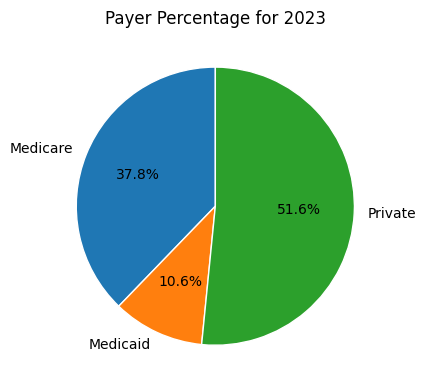

In [25]:
#visual of payers
payers = ['Medicare', 'Medicaid', 'Private']
percentages = [medicare_2023__percentage, medicaid_2023__percentage, private_2023__percentage]
plt.figure(figsize=(6,4))
plt.pie(percentages, labels=payers, autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'white'})
plt.title('Payer Percentage for 2023')
plt.tight_layout()
plt.show()

In [ ]:

# create a function for plotting
def plot_labels(data , x_axis=None,y_axis=None, kind='bar', title= '', xlabel='', ylabel='', figsize=(10,6), color=None):
    ax = data.plot(x=x_axis, y=y_axis, kind=kind,figsize=figsize, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [ ]:
#total payments for year by care facility
facility_payments = {'Outpatient': outpatient_total_payments, 'Hospital': hospital_total_payments, 'ER':ER_total_payments}
facility_payments_df = pd.DataFrame(facility_payments)

In [8]:
summary = {'Medicare':[ER_medicare,hospital_medicare,outpatient_medicare], 
'Medicaid': [ER_medicaid, hospital_medicaid, outpatient_medicaid],
'Private': [ER_private, hospital_private, outpatient_private]}

summary_df = pd.DataFrame(summary, index=['ER', 'Hospital', 'Outpatient'])

In [9]:
#overview of the datset
summary_df.describe()

,Medicare,Medicaid,Private
count,3.000000e+00,3.000000e+00,3.000000e+00
mean,3.310128e+06,9.331633e+05,4.518852e+06
std,4.454929e+06,8.108439e+05,2.991478e+06
min,4.179155e+05,3.437070e+05,1.442374e+06
25%,7.450161e+05,4.708096e+05,3.069584e+06
50%,1.072117e+06,5.979123e+05,4.696795e+06
75%,4.756234e+06,1.227891e+06,6.057091e+06
max,8.440352e+06,1.857871e+06,7.417387e+06


The mean of all medicare, medicaid and private insurers shows medicaid as the largest, priveate payors and last, least mean payor as medicare.


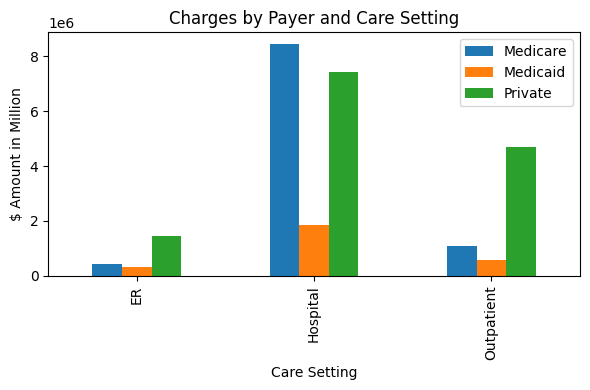

<Figure size 640x480 with 0 Axes>

In [ ]:
#visual
plot_labels(summary_df, kind='bar', title='Charges by Payer and Care Setting', xlabel='Care Setting', ylabel='$ Amount in Million', figsize=(6,4))

plt.xticks
plt.tight_layout()
plt.show()

The dataset rows for each care setting:
ER:2500
Hospital:1119
Outpatient:11422

The hospital has 10,000 less rows than outpatient dataset, but has significantly more payor reimbursements across all payers.
This aligns with the describe() max information.

KPI #1 the highest payment for 2023 is Medicare in the hospital care setting.

In [11]:
#Top three frequent ICD10 variables
ER_conditions = ER_df['ICD10'].value_counts().head(3)
hospital_conditions = hospital_df['ICD10'].value_counts().head(3)
outpatient_conditions = outpatient_df['ICD10'].value_counts().head(3)


print(f'Top 3 frequent ER_conditions: {ER_conditions}')
print(f'Top 3 frequent hospital_conditions: {hospital_conditions}')
print(f'Top 3 frequent outpatient_conditions: {outpatient_conditions}')


Top 3 frequent ER_conditions: ICD10
I10    93
T14    90
N39    81
Name: count, dtype: int64
Top 3 frequent hospital_conditions: ICD10
Z34    75
Z96    50
J18    45
Name: count, dtype: int64
Top 3 frequent outpatient_conditions: ICD10
C50    677
M25    418
E11    348
Name: count, dtype: int64


In [12]:

#plot common ICD10 conditions for each care facility
conditions_per_facility = pd.DataFrame({'ER_conditions':ER_df['ICD10'].value_counts().head(3),
                                       'hospital_conditions':hospital_df['ICD10'].value_counts().head(3),
                                       'outpatient_conditions':outpatient_df['ICD10'].value_counts().head(3)})


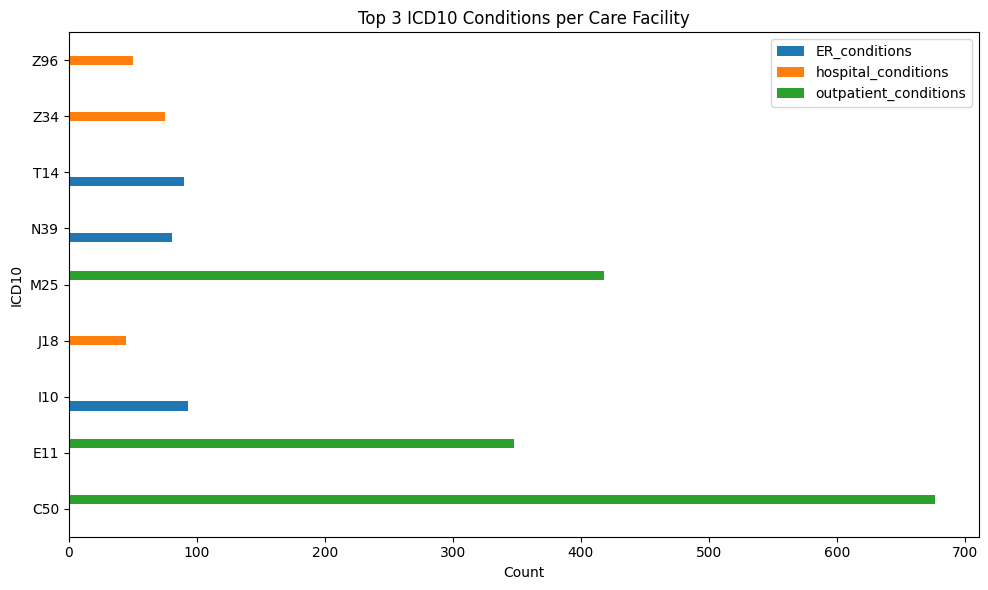

In [13]:
#use function for conditions_per_facility dataframe
plot_labels(conditions_per_facility, kind='barh', title='Top 3 ICD10 Conditions per Care Facility', xlabel='Count', ylabel='ICD10')


This horizontal bar chart is in line with our top three from each care facility code above.  The codes were crossed referenced with the MEPS ICD10 file:
    - ER care facility number one visit: I10 = ESSENTIAL (PRIMARY) HYPERTENSION                           
    - Hospital care facility number one visit: Z34 = ENCOUNTER FOR SUPERVISION OF NORMAL PREGNANCY              
    - Outpatient care facility number one visit: C50 = MALIGNANT NEOPLASM OF BREAST 
                            

In [14]:
#do any of the care facilities have a certain code that all of them treat and how large is it?

#codes in all facilities
codes = set(ER_df['ICD10'].unique())\
    & set(hospital_df['ICD10'].unique())\
    & set(outpatient_df['ICD10'].unique())
    
print(f'Number of ICD10 variables for all care facilities: {len(codes)}')

#how many ICD10 variables are there in all of the datasets
ER_ICD10 = ER_df['ICD10'].value_counts()
hospital_ICD10 = hospital_df['ICD10'].value_counts()
outpatient_ICD10 = outpatient_df['ICD10'].value_counts()

#combine all counts into one dataframe
common_condition = pd.DataFrame({'ER': ER_ICD10, 'Hospital': hospital_ICD10, 'Outpatient':outpatient_ICD10})

#keep only codes that are in all 3 datasets
common_condition = common_condition.loc[list(codes)]

#sort by volume
common_condition['Total'] = common_condition.sum(axis=1)
common_condition = common_condition.sort_values(by='Total', ascending=False)

common_condition.head(5)

Number of ICD10 variables for all care facilities: 147


,ER,Hospital,Outpatient,Total
ICD10,,,,
C50,4.0,7.0,677.0,688.0
M25,36.0,29.0,418.0,483.0
E11,36.0,15.0,348.0,399.0
M54,53.0,7.0,326.0,386.0
Z34,47.0,75.0,255.0,377.0


All care facilities altogether have 147 ICD10 variables.  They share C50 as the number one, but just looking at it shows us that the Outpatient facility is consuming the count.  There are two other variables that are not on the top three list shown in the common ICD10 variable.
    - M25: OTHER JOINT DISORDER, NOT ELSEWHERE CLASSIFIED             
    - E11: TYPE 2 DIABETES MELLITUS"                                   

In the analysis we have uncovered hospital visits accounted for the most paid care facility.  Office visits were the highest visits from our datasets in 2023. The condition that accounted to the most visits for the 2023 dataset was outpatient C50, Malignant neoplasm of the breast. The outpatient dataset is so much larger than the other datasets that patterns are obscured. The use of standardized counts will show which ICD10 codes are common in each care setting and not just the highest count. 

In [15]:
#change ICD10 codes to the percentage of visits from each dataset
ER_ICD_percent = ER_ICD10/ER_ICD10.sum()*100
hospital_ICD_percent = hospital_ICD10/hospital_ICD10.sum()*100
outpatient_ICD_percent = outpatient_ICD10/outpatient_ICD10.sum()*100

#combine to dataframe
common_condition_percent = pd.DataFrame({'ER_%': ER_ICD_percent, 'Hospital_%': hospital_ICD_percent,
                                         'Outpatient_%': outpatient_ICD_percent})

#codes in all datasets
common_condition_percent = common_condition_percent.loc[list(codes)]

#create column for average percent to see rank(large #  across all sets), rather than just a large percentage
common_condition_percent['Average_%'] = common_condition_percent.mean(axis=1)

#sort the most common ICD10
common_condition_percent = common_condition_percent.sort_values(by='Average_%', ascending=False)
#format
common_condition_percent = common_condition_percent.round(2)

common_condition_percent.head(3)

,ER_%,Hospital_%,Outpatient_%,Average_%
ICD10,,,,
Z34,1.88,6.70,2.23,3.60
M25,1.44,2.59,3.66,2.56
I10,3.72,2.95,0.94,2.54


Now looking at the percentage instead of count a inflated by outpatient volume Z34, Encounter for supervision of normal pregnancy is the common condition across all three care facilities.

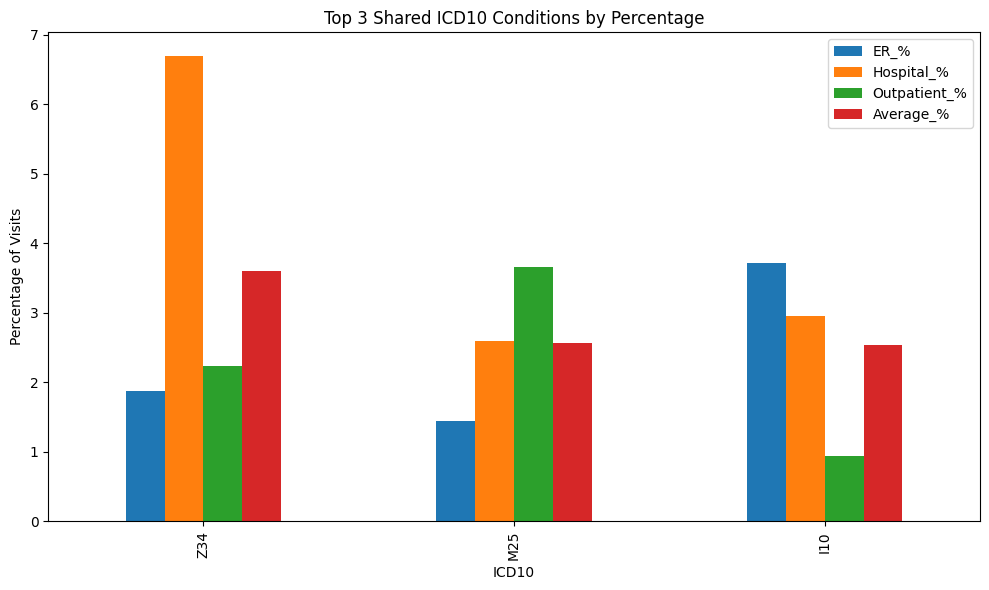

In [16]:
#visual
top3 = common_condition_percent.head(3)

#function for plotting
plot_labels(top3, kind='bar', title='Top 3 Shared ICD10 Conditions by Percentage', xlabel='ICD10',
            ylabel='Percentage of Visits')

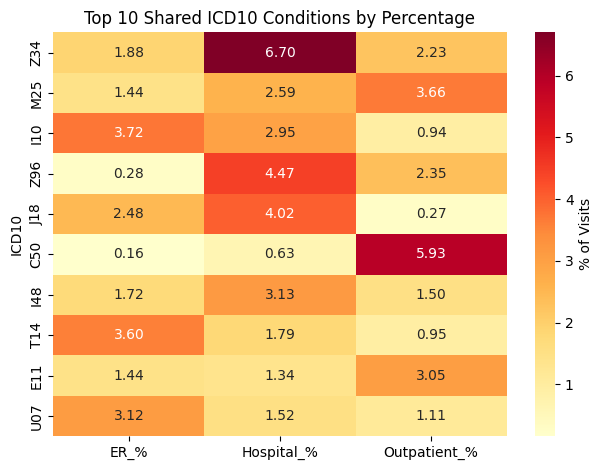

In [17]:

#heatmap for common conditions
#only the top conditions
top_10 = common_condition_percent.head(10).drop(columns='Average_%')

#plot with seaborn
sns.heatmap(top_10, annot=True,fmt='.2f', cmap='YlOrRd', cbar_kws={'label': '% of Visits'})
plt.title('Top 10 Shared ICD10 Conditions by Percentage')
plt.xlabel=('Care Facility')
plt.ylabel=('ICD10')
plt.tight_layout()
plt.show()

The heat chart color and organization brings the ICD10 varaibles into focus more than the top3 barchart above.  The density of color for the top shared ICD10 Z34 for instance has the highest percentage in the Hospital_% column, and still shows the other columns percentage contribution to being the top common ICD10.

KPI#3:
Now the top common ICD10 condition treatment for 2023 from payers is Z34,  Encounter for supervision of normal pregnancy.